<a href="https://colab.research.google.com/github/aaptecode/DS-Unit-4-Sprint-2-NLP/blob/master/LS_DS_423_Document_Classification_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now it's your turn!

Use the following dataset of scraped "Data Scientist" and "Data Analyst" job listings to create your own Document Classification Models.

<https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-NLP/master/module3-Document-Classification/job_listings.csv>

Requirements:

- Apply both CountVectorizer and TfidfVectorizer methods to this data and compare results
- Use at least two different classification models to compare differences in model accuracy
- Try to "Hyperparameter Tune" your model by using different n_gram ranges, max_results, and data cleaning methods
- Try and get the highest accuracy possible!

## Import Packages

In [0]:
##### Your Code Here #####
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import warnings

style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')

## Data Prep and Cleanup

In [41]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-2-NLP/master/module3-Document-Classification/job_listings.csv'

df = pd.read_csv(url)

print(df.shape)

df.head()

(500, 3)


,description,title,job
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Data Scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,Data Scientist
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,Data Scientist
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Data Scientist


In [42]:
df.isnull().sum()

description    1
title          1
job            0
dtype: int64

In [43]:
df = df[pd.notnull(df['description'])]

df.isnull().sum()

description    0
title          0
job            0
dtype: int64

In [44]:
df.job.value_counts()

Data Scientist    250
Data Analyst      249
Name: job, dtype: int64

In [45]:
df['job_label'] = df.job.map({'Data Analyst': 0, 'Data Scientist': 1}) # Easy Encoder

df.head()

,description,title,job,job_label
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,Data Scientist,1
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,Data Scientist,1
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,Data Scientist,1
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,Data Scientist,1
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,Data Scientist,1


In [46]:
df['job_label'].value_counts()

1    250
0    249
Name: job_label, dtype: int64

In [47]:
y = df['job_label']
X = df['description']

X.shape, y.shape

((499,), (499,))

In [0]:
# vectorizer = cv

# vectorizer.fit(X_train)
# print(vectorizer.vocabulary_)
# print(len(vectorizer.vocabulary_))

In [0]:
# train_word_counts = vectorizer.transform(X_train)
# test_word_counts = vectorizer.transform(X_test)

## Report Function

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Vectorizers
cv = CountVectorizer(max_features=None, ngram_range=(1,1), stop_words='english')
tfidf = TfidfVectorizer(max_features=None, ngram_range=(1,1), stop_words='english')

# Classifiers
LR = LogisticRegression(solver='lbfgs',random_state=237)
MNB = MultinomialNB()
RF = RandomForestClassifier()

results = {}

In [0]:
def vectorizer_report(vectorizer, model, X, y):
    '''Produces accuracy results for a given vectorizer'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=237)
    
    vectorizer.fit(X_train)
    train_word_counts = vectorizer.transform(X_train)
    test_word_counts = vectorizer.transform(X_test)
    
#     X_train_vectorized = pd.DataFrame(train_word_counts.toarray(), columns=vectorizer.get_feature_names())
#     X_test_vectorized = pd.DataFrame(test_word_counts.toarray(), columns=vectorizer.get_feature_names())
    
    model.fit(train_word_counts, y_train)
    train_predictions = model.predict(train_word_counts)
    test_predictions = model.predict(test_word_counts)
    
    print('REPORT\n')
    print(f'Train Accuracy:  {round(accuracy_score(y_train, train_predictions),6)}')
    print(f' Test Accuracy:  {round(accuracy_score(y_test, test_predictions),6)}')
    print()
    confusion_matrix = pd.crosstab(y_test, test_predictions, rownames=['Actual'], colnames=['Predicted'])
    precision = confusion_matrix[1][1] / (confusion_matrix[1][1] + confusion_matrix[1][0])
    recall = confusion_matrix[1][1] / (confusion_matrix[1][1] +  confusion_matrix[0][1])
    f1_score = 2*(precision * recall)/(precision + recall)
    print(f'Precision:  {round(precision, 6)}')
    print(f'   Recall:  {round(recall, 6)}')
    print(f' F1-score:  {round(f1_score, 6)}')
    print()
    print(confusion_matrix)
    
    return accuracy_score(y_test, test_predictions)

### Count Vectorizer

#### Logistic Regression

In [52]:
results['cv_LR'] = vectorizer_report(cv,LR, X, y)

REPORT

Train Accuracy:  0.994987
 Test Accuracy:  0.89

Precision:  0.952381
   Recall:  0.816327
 F1-score:  0.879121

Predicted   0   1
Actual           
0          49   2
1           9  40


#### Multinomial Naive Bayes

In [53]:
results['cv_MNB'] = vectorizer_report(cv,MNB, X, y)

REPORT

Train Accuracy:  0.969925
 Test Accuracy:  0.82

Precision:  0.829787
   Recall:  0.795918
 F1-score:  0.8125

Predicted   0   1
Actual           
0          43   8
1          10  39


#### Random Forest

In [54]:
results['cv_RF'] = vectorizer_report(cv,RF, X, y)

REPORT

Train Accuracy:  0.994987
 Test Accuracy:  0.86

Precision:  0.888889
   Recall:  0.816327
 F1-score:  0.851064

Predicted   0   1
Actual           
0          46   5
1           9  40


### TFIDF Vectorizer

#### Logistic Regression

In [55]:
results['tfidf_LR'] = vectorizer_report(tfidf,LR, X, y)

REPORT

Train Accuracy:  0.972431
 Test Accuracy:  0.83

Precision:  0.880952
   Recall:  0.755102
 F1-score:  0.813187

Predicted   0   1
Actual           
0          46   5
1          12  37


#### Multinomial Naive Bayes

In [56]:
results['tfidf_MNB'] = vectorizer_report(tfidf,MNB, X, y)

REPORT

Train Accuracy:  0.972431
 Test Accuracy:  0.82

Precision:  0.816327
   Recall:  0.816327
 F1-score:  0.816327

Predicted   0   1
Actual           
0          42   9
1           9  40


#### Random Forest

In [57]:
results['tfidf_RF'] = vectorizer_report(tfidf,RF, X, y)

REPORT

Train Accuracy:  0.992481
 Test Accuracy:  0.82

Precision:  0.844444
   Recall:  0.77551
 F1-score:  0.808511

Predicted   0   1
Actual           
0          44   7
1          11  38


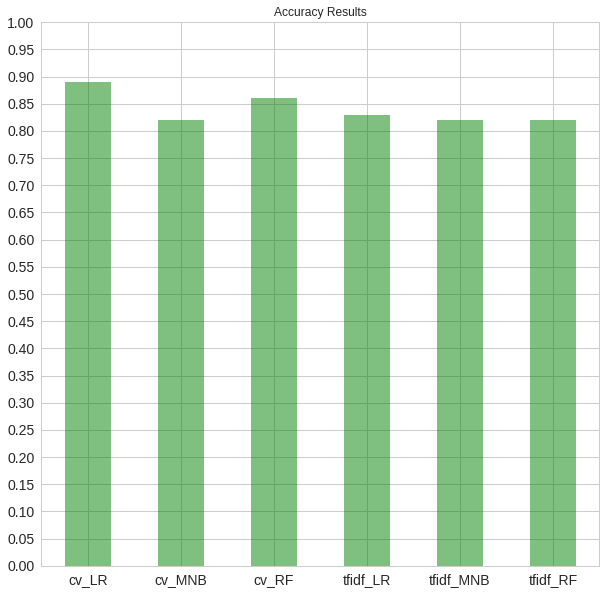

In [58]:
pd.DataFrame.from_records([results]).T.plot.bar(color='green', 
                                                 alpha = 0.5, 
                                                 title = 'Accuracy Results',
                                                 legend = False,
                                                 yticks=[i*1.0/20 for i in range(0,21)],
                                                 fontsize = 14, 
                                                 rot = 0,
                                                 position = 0.5,
                                                 figsize=(10,10));

# Stretch Goals

- Try some agglomerative clustering using cosine-similarity-distance! (works better with high dimensional spaces) robust clustering - Agglomerative clustering like Ward would be cool. Try and create an awesome Dendrogram of the most important terms from the dataset.

- Awesome resource for clustering stretch goals: 
 - Agglomerative Clustering with Scipy: <https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/>
 - Agglomerative Clustering for NLP: <http://brandonrose.org/clustering>
 
- Use Latent Dirichlet Allocation (LDA) to perform topic modeling on the dataset: 
 - Topic Modeling and LDA in Python: <https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24>
 - Topic Modeling and LDA using Gensim: <https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/>
